In [41]:
import pandas as pd
from pathlib import Path

# Define directories
data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data"
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"

# Load FMP data

df = pd.read_excel(f"{data_dir}/FMP/ee_fmp.xlsx", sheet_name="Data")

# Rename column
df.rename(columns={"FMP_SA": "ee_pol"}, inplace=True)

# Create 'date_monthly' column
df["date_monthly"] = pd.to_datetime(df[["year", "month"]].assign(day=1))

# Keep only relevant columns
df = df[["date_monthly", "ee_pol"]]

df['ee_pol'] = df['ee_pol'] * 100 
df['ee_pol_ma3'] = df["ee_pol"].rolling(window=3).mean() 

# save monthly data 
df.to_csv(f"{output_dir}/data/ee_monthly.csv", index = False )

# Create 'date_quarterly' column
df["date_quarterly"] = df["date_monthly"].dt.to_period("Q").dt.start_time


# Collapse to quarterly level by averaging 'ee_pol'
df_quarterly = df.groupby("date_quarterly", as_index=False)["ee_pol"].mean()


df_quarterly.to_csv(f"{output_dir}/data/ee_quarterly.csv", index=False)


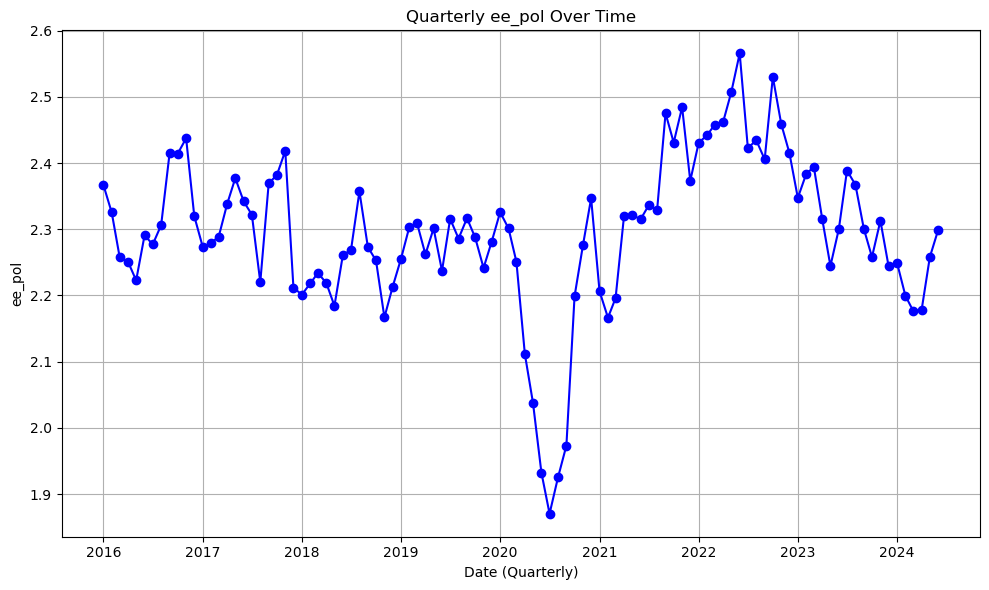

In [45]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df["date_monthly"], df["ee_pol_ma3"], marker="o", linestyle="-", color="blue")
plt.title("Quarterly ee_pol Over Time")
plt.xlabel("Date (Quarterly)")
plt.ylabel("ee_pol")
plt.grid(True)
plt.tight_layout()
plt.show()